In [1]:
# Import necessary libraries
import numpy as np  # For numerical operations
import pandas as pd  # For handling datasets
from sklearn.model_selection import train_test_split  # Splitting data into train & test sets
from sklearn.linear_model import LinearRegression  # Linear Regression Model
from sklearn.preprocessing import StandardScaler  # Standardization of data
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # Evaluation metrics

In [2]:
# Importing Keras (for Neural Network)
import keras
from keras.models import Sequential  # To define a sequential model
from keras.layers import Dense  # Fully connected layers

In [3]:
boston = pd.read_csv("boston_house_prices.csv")

In [4]:
# Selecting Features and Target
# Selecting 3 input features: 
# 1. LSTAT (Percentage of lower status population)
# 2. RM (Average number of rooms per dwelling)
# 3. PTRATIO (Pupil-teacher ratio by town)
X = boston[['LSTAT', 'RM', 'PTRATIO']]

In [5]:
# Target variable: House Price
y = boston['PRICE']


In [6]:
# Splitting the Dataset into Training and Testing Sets
# 80% of data used for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [7]:
# Standardizing the Dataset (Feature Scaling)
# Standardization improves model performance by normalizing feature values
scaler = StandardScaler()  # Initializing StandardScaler
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform training data
X_test_scaled = scaler.transform(X_test)  # Transform test data using the same scaler

In [8]:
# Linear Regression Model
lr_model = LinearRegression()  # Initializing Linear Regression Model
lr_model.fit(X_train_scaled, y_train)  # Training the model using scaled training data

LinearRegression()

In [9]:
# Predicting house prices on test data
y_pred_lr = lr_model.predict(X_test_scaled)

In [10]:
# Evaluating Linear Regression Model
mse_lr = mean_squared_error(y_test, y_pred_lr)  # Mean Squared Error
mae_lr = mean_absolute_error(y_test, y_pred_lr)  # Mean Absolute Error
r2_lr = r2_score(y_test, y_pred_lr)  # R² Score (Model accuracy measure)

In [11]:
# Displaying evaluation metrics
print("Linear Regression Model Evaluation:")
print(f"Mean Squared Error: {mse_lr}")
print(f"Mean Absolute Error: {mae_lr}")
print(f"R2 Score: {r2_lr}")

Linear Regression Model Evaluation:
Mean Squared Error: 30.3401051902346
Mean Absolute Error: 3.5844321029226935
R2 Score: 0.6733732528519258


In [12]:
# Neural Network (ANN) Model
# Creating a Deep Learning Model using Keras Sequential API
model = Sequential([
    Dense(128, activation='relu', input_dim=3),  # Input layer (3 features) & first hidden layer (128 neurons)
    Dense(64, activation='relu'),  # Second hidden layer with 64 neurons
    Dense(32, activation='relu'),  # Third hidden layer with 32 neurons
    Dense(16, activation='relu'),  # Fourth hidden layer with 16 neurons
    Dense(1)  # Output layer (Predicting a single value - House Price)
])

C:\Users\Admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Compiling the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])  
# Optimizer: Adam (Adaptive Learning Rate Optimization)
# Loss function: Mean Squared Error (MSE) - Suitable for regression problems
# Metric: Mean Absolute Error (MAE) - Helps measure performance

In [14]:
# Training the Neural Network
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.05, verbose=1)
# Training for 100 epochs
# Using 5% of training data as validation set to monitor overfitting
# `verbose=1` displays detailed training progress

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 577.4276 - mae: 22.1887 - val_loss: 464.6205 - val_mae: 20.6142
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 595.4544 - mae: 22.5279 - val_loss: 454.8445 - val_mae: 20.3865
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 538.1331 - mae: 21.5487 - val_loss: 432.4517 - val_mae: 19.8450
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 523.9056 - mae: 21.2277 - val_loss: 380.8384 - val_mae: 18.5160
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 457.5042 - mae: 19.4433 - val_loss: 273.1425 - val_mae: 15.5996
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 260.4355 - mae: 14.4423 - val_loss: 119.5032 - val_mae: 9.9288
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 106.6093 - mae: 8.7732 - val_loss: 66.8717 - val_mae: 6.1854
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 82.7666 - mae: 6.9433 - val_loss: 41.6869 - val_mae: 5.2489
Epoch 9/100
12/1

In [15]:
# Evaluating the Neural Network Model
y_pred_nn = model.predict(X_test_scaled)  # Predicting house prices on test data
mse_nn, mae_nn = model.evaluate(X_test_scaled, y_test)  # Evaluating model performance

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 17.0901 - mae: 2.6551


In [16]:
# Displaying Neural Network Evaluation Metrics
print("\nNeural Network Model Evaluation:")
print(f"Mean Squared Error: {mse_nn}")
print(f"Mean Absolute Error: {mae_nn}")


Neural Network Model Evaluation:
Mean Squared Error: 21.369155883789062
Mean Absolute Error: 2.833932399749756


In [17]:
# House Price Prediction for New Data
new_data = np.array([[0.1, 10.0, 5.0]])  
# New input values: LSTAT=0.1, RM=10.0, PTRATIO=5.0


In [19]:
new_data_scaled = scaler.transform(new_data) 
 # Applying the same standardization as training data

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [20]:
# Predicting price using trained neural network model
prediction = model.predict(new_data_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


In [21]:
# Displaying the predicted house price
print("\nPredicted House Price:", prediction[0][0])


Predicted House Price: 80.992836


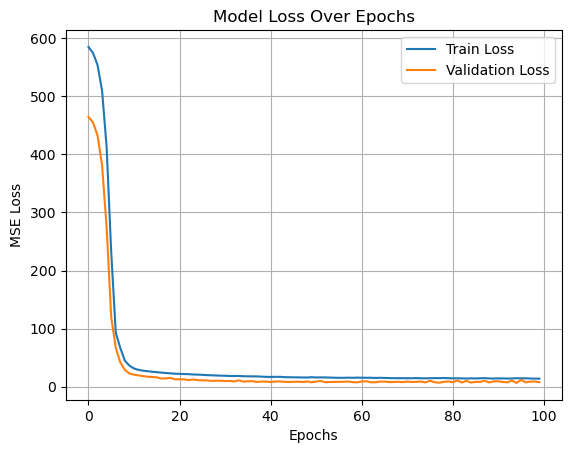

In [23]:
import matplotlib.pyplot as plt
# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()